In [6]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
ab=pd.read_csv("titanic_dataset.csv")
df=pd.DataFrame(ab)

In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
imputer=SimpleImputer(strategy='mean')
df['Age']=imputer.fit_transform(df[['Age']])

In [11]:
df['Cabin']=df['Cabin'].fillna('Unknown')

In [12]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

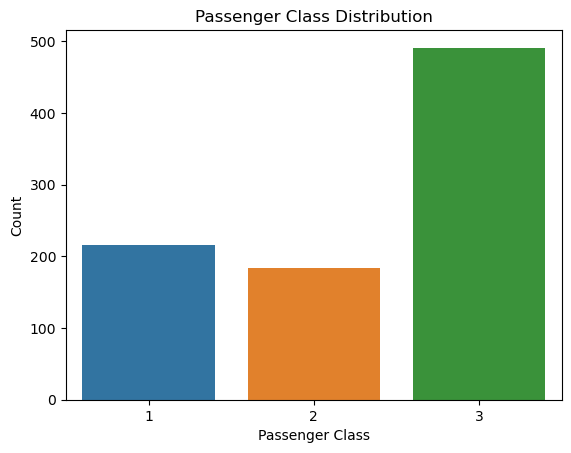

In [13]:
import seaborn as sns
sns.countplot(x='Pclass',data=df)
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

In [14]:
female=df[(df['Sex']=='female') & (df['Survived']==1)]
print("names of female passengers who survived:")
for names in female['Name']:
  print(names)

names of female passengers who survived:
Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Heikkinen, Miss. Laina
Futrelle, Mrs. Jacques Heath (Lily May Peel)
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Nasser, Mrs. Nicholas (Adele Achem)
Sandstrom, Miss. Marguerite Rut
Bonnell, Miss. Elizabeth
Hewlett, Mrs. (Mary D Kingcome) 
Masselmani, Mrs. Fatima
McGowan, Miss. Anna "Annie"
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)
O'Dwyer, Miss. Ellen "Nellie"
Spencer, Mrs. William Augustus (Marie Eugenie)
Glynn, Miss. Mary Agatha
Nicola-Yarred, Miss. Jamila
Laroche, Miss. Simonne Marie Anne Andree
Devaney, Miss. Margaret Delia
O'Driscoll, Miss. Bridget
Harper, Mrs. Henry Sleeper (Myna Haxtun)
Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)
Rugg, Miss. Emily
West, Miss. Constance Mirium
Icard, Miss. Amelie
Nye, Mrs. (Elizabeth Ramell)
Andersson, Miss. Erna Alexandra
Dowdell, Miss. Elizabeth
McDermott, Miss. Brigdet Delia
Ilett, Miss. Bertha
Backstrom, Mrs. Karl Alfred (M

In [15]:
thirdclass=df[(df['Pclass']==3) & (df['Age']<18)]
display(thirdclass)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Unknown,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,Unknown,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Unknown,Q
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,Unknown,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
844,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,Unknown,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,Unknown,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,Unknown,C
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,Unknown,S


In [16]:
passengers=df[(df['Pclass']==1) & (df['Age']>40)]
display(passengers)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,Unknown,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,Unknown,S
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S


In [17]:
passengers_survived = passengers[passengers['Survived'] == 1]
print("\n1st class passengers older than 40 who survived:")
print(passengers_survived)


1st class passengers older than 40 who survived:
     PassengerId  Survived  Pclass  \
11            12         1       1   
52            53         1       1   
187          188         1       1   
194          195         1       1   
195          196         1       1   
268          269         1       1   
275          276         1       1   
299          300         1       1   
337          338         1       1   
366          367         1       1   
380          381         1       1   
449          450         1       1   
453          454         1       1   
460          461         1       1   
496          497         1       1   
513          514         1       1   
523          524         1       1   
556          557         1       1   
571          572         1       1   
587          588         1       1   
591          592         1       1   
599          600         1       1   
621          622         1       1   
630          631         1       1   


In [18]:
male_fare_gt_100 = df[(df['Sex'] == 'male') & (df['Fare'] > 100)]
print(male_fare_gt_100)

     PassengerId  Survived  Pclass  \
27            28         0       1   
118          119         0       1   
305          306         1       1   
332          333         0       1   
373          374         0       1   
377          378         0       1   
390          391         1       1   
438          439         0       1   
505          506         0       1   
527          528         0       1   
544          545         0       1   
550          551         1       1   
557          558         0       1   
659          660         0       1   
660          661         1       1   
679          680         1       1   
698          699         0       1   
737          738         1       1   
802          803         1       1   

                                           Name   Sex        Age  SibSp  \
27               Fortune, Mr. Charles Alexander  male  19.000000      3   
118                    Baxter, Mr. Quigg Edmond  male  24.000000      0   
305           

In [19]:
embarked_C_class2 = df[(df['Embarked'] == 'C') & (df['Pclass'] == 2)]
print(embarked_C_class2)

     PassengerId  Survived  Pclass  \
9             10         1       2   
43            44         1       2   
122          123         0       2   
135          136         0       2   
181          182         0       2   
292          293         0       2   
308          309         0       2   
361          362         0       2   
389          390         1       2   
473          474         1       2   
547          548         1       2   
608          609         1       2   
685          686         0       2   
817          818         0       2   
827          828         1       2   
866          867         1       2   
874          875         1       2   

                                                  Name     Sex        Age  \
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.000000   
43            Laroche, Miss. Simonne Marie Anne Andree  female   3.000000   
122                               Nasser, Mr. Nicholas    male  32.500000   
135    

In [20]:
sibsp_gt_2 = df[df['SibSp'] > 2]
print(sibsp_gt_2)

     PassengerId  Survived  Pclass  \
7              8         0       3   
16            17         0       3   
24            25         0       3   
27            28         0       1   
50            51         0       3   
59            60         0       3   
63            64         0       3   
68            69         1       3   
71            72         0       3   
85            86         1       3   
88            89         1       1   
119          120         0       3   
159          160         0       3   
164          165         0       3   
171          172         0       3   
176          177         0       3   
180          181         0       3   
182          183         0       3   
201          202         0       3   
229          230         0       3   
233          234         1       3   
261          262         1       3   
266          267         0       3   
278          279         0       3   
324          325         0       3   
341         

In [21]:
no_family_not_survived = df[(df['Survived'] == 0) & (df['SibSp'] == 0) & (df['Parch'] == 0)]
print(no_family_not_survived)

     PassengerId  Survived  Pclass                                  Name  \
4              5         0       3              Allen, Mr. William Henry   
5              6         0       3                      Moran, Mr. James   
6              7         0       1               McCarthy, Mr. Timothy J   
12            13         0       3        Saundercock, Mr. William Henry   
14            15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   
..           ...       ...     ...                                   ...   
882          883         0       3          Dahlberg, Miss. Gerda Ulrika   
883          884         0       2         Banfield, Mr. Frederick James   
884          885         0       3                Sutehall, Mr. Henry Jr   
886          887         0       2                 Montvila, Rev. Juozas   
890          891         0       3                   Dooley, Mr. Patrick   

        Sex        Age  SibSp  Parch            Ticket     Fare    Cabin  \
4      male

In [22]:
oldest_survived = df[df['Survived'] == 1].sort_values(by='Age', ascending=False).head(5)
print(oldest_survived)

     PassengerId  Survived  Pclass                                       Name  \
630          631         1       1       Barkworth, Mr. Algernon Henry Wilson   
483          484         1       3                     Turkula, Mrs. (Hedwig)   
275          276         1       1          Andrews, Miss. Kornelia Theodosia   
570          571         1       2                         Harris, Mr. George   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch       Ticket     Fare    Cabin Embarked  
630    male  80.0      0      0        27042  30.0000      A23        S  
483  female  63.0      0      0         4134   9.5875  Unknown        S  
275  female  63.0      1      0        13502  77.9583       D7        S  
570    male  62.0      0      0  S.W./PP 752  10.5000  Unknown        S  
829  female  62.0      0      0       113572  80.0000      B28        S  


In [23]:
fare_zero = df[df['Fare'] == 0]
print(fare_zero)

     PassengerId  Survived  Pclass                              Name   Sex  \
179          180         0       3               Leonard, Mr. Lionel  male   
263          264         0       1             Harrison, Mr. William  male   
271          272         1       3      Tornquist, Mr. William Henry  male   
277          278         0       2       Parkes, Mr. Francis "Frank"  male   
302          303         0       3   Johnson, Mr. William Cahoone Jr  male   
413          414         0       2    Cunningham, Mr. Alfred Fleming  male   
466          467         0       2             Campbell, Mr. William  male   
481          482         0       2  Frost, Mr. Anthony Wood "Archie"  male   
597          598         0       3               Johnson, Mr. Alfred  male   
633          634         0       1     Parr, Mr. William Henry Marsh  male   
674          675         0       2        Watson, Mr. Ennis Hastings  male   
732          733         0       2              Knight, Mr. Robe

In [25]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print(f"\nTraining set shape: {train_df.shape}")
print(f"Testing set shape: {test_df.shape}")


Training set shape: (712, 12)
Testing set shape: (179, 12)
